In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn import preprocessing

In [17]:
def smote(X,y):
    smote = SMOTE(random_state=123)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

In [22]:
train_data = pd.read_csv(r"D:\study\paper\ubiquitination\null_importances_result\train_test\train_ElasticNet_arab.csv")
test_data = pd.read_csv(r"D:\study\paper\ubiquitination\null_importances_result\train_test\test_ElasticNet_arab.csv")

train_data_val = train_data.values
test_data_val = test_data.values

train_X = train_data_val[:,1:]
train_y = train_data_val[:,0]

test_X = test_data_val[:,1:]
test_y = test_data_val[:,0]

In [23]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
train_X_minmax = min_max_scaler.fit_transform(train_X)
test_X_minmax = min_max_scaler.transform(test_X)

ElasticNet+SVM: AUC = 0.766
ElasticNet+DT: AUC = 0.584
ElasticNet+RF: AUC = 0.767
ElasticNet+XGBoost: AUC = 0.754


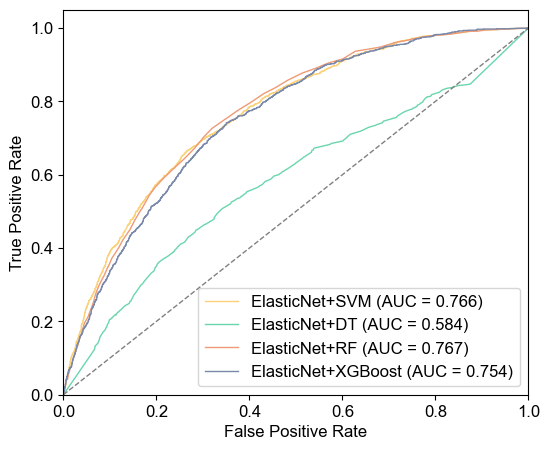

In [24]:
# 初始化五种不同的分类器
classifiers = {
    "ElasticNet+SVM": SVC(C = 10, gamma = 0.01, probability=True, random_state = 123),
    "ElasticNet+DT": DecisionTreeClassifier(max_depth = 10, random_state = 123),
    "ElasticNet+RF": RandomForestClassifier(n_estimators = 150, random_state = 123),
    "ElasticNet+XGBoost": xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 150, subsample = 0.8, gamma = 0.2, random_state = 123)
}

# 初始化五折交叉验证
skf = StratifiedKFold(n_splits = 5, random_state = 123, shuffle = True)

# 初始化存储每个分类器的ROC曲线数据
roc_data = {}

# 自定义每个分类器的线条颜色
colors = {
    "ElasticNet+SVM": '#fbd279',
    "ElasticNet+DT": '#6ad6ac',
    "ElasticNet+RF": '#ef9a76',
    "ElasticNet+XGBoost": '#7a89aa'
}

# 进行交叉测试和绘制ROC曲线
plt.figure(figsize=(6, 5))
# 设置默认字体样式和大小
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
for name, clf in classifiers.items():
    
    y_test_array = np.array([])
    y_pred_proba_array = np.array([])
    
    if 'SVM' not in name:
        for train_idx, test_idx in skf.split(train_X, train_y):
            X_train, X_test = train_X[train_idx], train_X[test_idx]
            y_train, y_test = train_y[train_idx], train_y[test_idx]
            smote_x, smote_y = smote(X_train,y_train)
            clf.fit(smote_x, smote_y)
            y_score = clf.predict_proba(X_test)[:, 1]
            y_test_array = np.concatenate((y_test_array, y_test))
            y_pred_proba_array = np.concatenate((y_pred_proba_array, y_score))   
        
    else:
        for train_idx, test_idx in skf.split(train_X_minmax, train_y):
            X_train, X_test = train_X_minmax[train_idx], train_X_minmax[test_idx]
            y_train, y_test = train_y[train_idx], train_y[test_idx]
            smote_x, smote_y = smote(X_train,y_train)
            clf.fit(smote_x, smote_y)
            y_score = clf.predict_proba(X_test)[:, 1]
            y_test_array = np.concatenate((y_test_array, y_test))
            y_pred_proba_array = np.concatenate((y_pred_proba_array, y_score))

    fpr, tpr, _ = roc_curve(y_test_array, y_pred_proba_array)
    
    auc_val = roc_auc_score(y_test_array, y_pred_proba_array)
    
    
    roc_data[name] = (fpr, tpr, auc_val)
    
    plt.plot(fpr, tpr, lw=1, label=f'{name} (AUC = {auc_val:.3f})', color=colors[name])

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('arab_ElasticNet_5fold_roc.pdf', format='pdf', dpi=1200)
# 显示每个分类器的AUC
for name, (_, _, auc_val) in roc_data.items():
    print(f"{name}: AUC = {auc_val:.3f}")

plt.show()

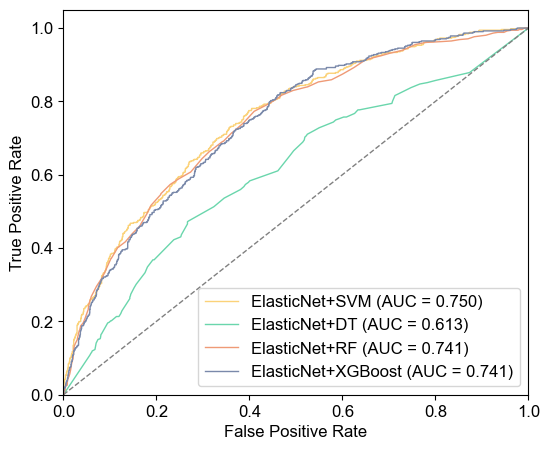

In [25]:
# 初始化不同的分类器
classifiers = {
    "ElasticNet+SVM": SVC(C = 10, gamma = 0.01, probability=True, random_state = 123),
    "ElasticNet+DT": DecisionTreeClassifier(max_depth = 10, random_state = 123),
    "ElasticNet+RF": RandomForestClassifier(n_estimators = 150, random_state = 123),
    "ElasticNet+XGBoost": xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 150, subsample = 0.8, gamma = 0.2, random_state = 123)
}

colors = {
    "ElasticNet+SVM": '#fbd279',
    "ElasticNet+DT": '#6ad6ac',
    "ElasticNet+RF": '#ef9a76',
    "ElasticNet+XGBoost": '#7a89aa'
}

# 绘制ROC曲线
plt.figure(figsize=(6, 5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
for name, clf in classifiers.items():
    if 'SVM' not in name:
        smote_train_X, smote_train_y = smote(train_X, train_y)
        clf.fit(smote_train_X, smote_train_y)
        y_score = clf.predict_proba(test_X)[:, 1]
    else:
        smote_train_X, smote_train_y = smote(train_X_minmax, train_y)
        clf.fit(smote_train_X, smote_train_y)
        y_score = clf.predict_proba(test_X_minmax)[:, 1]
    
    fpr, tpr, _ = roc_curve(test_y, y_score)
    auc_val = roc_auc_score(test_y, y_score)
    plt.plot(fpr, tpr, lw=1, label=f'{name} (AUC = {auc_val:.3f})', color=colors[name])

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.savefig('arab_ElasticNet_test_roc.pdf', format='pdf', dpi=1200)

plt.show()